## Load Data

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
data = pd.read_csv("gdrive/MyDrive/BST281_FinalProject/preprocessing/normalized_data.tsv", sep='\t', index_col=0)
PC_data = pd.read_csv("gdrive/MyDrive/BST281_FinalProject/preprocessing/normalized_data_PC3.tsv", sep='\t', index_col=0)
DU_data = pd.read_csv("gdrive/MyDrive/BST281_FinalProject/preprocessing/normalized_data_DU145.tsv", sep='\t', index_col=0)

In [3]:
PC_data.head(5)

sample cell_line response  ID  ENSG00000008394.12|MGST1  \
0  GSM4161769       PC3      Res  84                 -1.097550   
2  GSM4161715       PC3      Res  30                  0.567121   
4  GSM4161745       PC3      Res  60                 -0.181654   
7  GSM4161616       PC3      Sen  21                  0.186515   
8  GSM4161684       PC3      Sen  89                 -0.023384   

   ENSG00000078668.13|VDAC3  ENSG00000023734.10|STRAP  \
0                  0.033803                 -0.773977   
2                  0.675891                 -1.317730   
4                  0.681365                  0.467985   
7                 -0.346329                  1.330647   
8                  0.557364                 -0.515834   

   ENSG00000041357.15|PSMA4  ENSG00000075415.12|SLC25A3  \
0                 -0.645446                    0.500319   
2                  0.681543                    0.580618   
4                 -0.082135                    0.561840   
7                  0.839010                    0.203131   
8                  0.378458                    0.031233   

   ENSG00000099860.8|GADD45B  ...  ENSG00000168615.11|ADAM9  \
0                  -0.590238  ...                  0.784400   
2                  -0.590238  ...                  0.927355   
4                   0.860808  ...                  0.515374   
7                  -1.914303  ...                  0.288937   
8                   0.895922  ...                 -0.141554   

   ENSG00000173812.10|EIF1  ENSG00000144959.9|NCEH1  ENSG00000245532.5|NEAT1  \
0                 0.511162                 0.822949                 1.654531   
2                 1.095973                -1.388493                 0.428909   
4                 0.895421                 0.459706                 0.096349   
7                 0.278142                 1.107653                 0.967448   
8                 0.817224                 1.113367                 0.343855   

   ENSG00000081041.8|CXCL2  ENSG00000251562.7|MALAT1  \
0                -0.461708                  1.748719   
2                 0.010889                  0.257977   
4                -0.461708                  1.671824   
7                -0.461708                  0.336510   
8                -0.461708                 -0.670916   

   ENSG00000248527.1|MTATP6P1  ENSG00000166710.17|B2M  \
0                    0.880784                0.885715   
2                    1.007531                0.788760   
4                    0.030053                1.527921   
7                    1.670668               -0.773733   
8                    0.132463                0.253960   

   ENSG00000104904.12|OAZ1  ENSG00000277791.4|PSMB3  
0                 0.503012                -0.473484  
2                 1.413873                 0.592194  
4                -0.096203                 0.563755  
7                 0.081382                 0.042453  
8                 0.866186                 0.903302  

[5 rows x 307 columns]

## Classification of Cell Line - PC


too few data point (i.e., 180 sample) so only do train-validation split; no independent testing

#### train_validation split

In [43]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

pc_X = PC_data.iloc[:, 4:]
pc_Y = PC_data.iloc[:, 2]
pc_X, pc_Y = shuffle(pc_X, pc_Y, random_state=1)
pc_X_train, pc_X_test, pc_Y_train, pc_Y_test = train_test_split(pc_X, pc_Y, test_size=0.3, random_state=1)
pc_Y_train[pc_Y_train == 'Sen'] = 1
pc_Y_train[pc_Y_train == 'Res'] = 0
pc_Y_test[pc_Y_test == 'Sen'] = 1
pc_Y_test[pc_Y_test == 'Res'] = 0

pc_X_train, pc_X_test = np.array(pc_X_train).astype('float32'), np.array(pc_X_test).astype('float32')
pc_Y_train, pc_Y_test = np.array(pc_Y_train).astype('int32'), np.array(pc_Y_test).astype('int32')

print(pc_X_train.shape)
print(pc_Y_train.shape)
print(pc_X_test.shape)
print(pc_Y_test.shape)

(126, 303)
(126,)
(54, 303)
(54,)


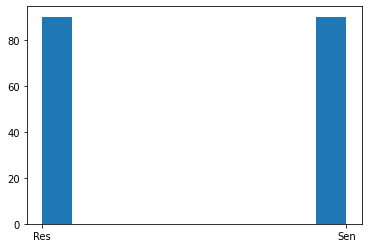

In [55]:
from matplotlib import pyplot as plt 
plt.hist(PC_data['response'])
plt.show()

#### Model training

In [107]:
from tensorflow.keras.metrics import AUC
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD

num_features = pc_X_train.shape[1]

model = Sequential()
model.add(Dense(units=10, activation='relu', input_dim=num_features, name='hidden_layer1'))
model.add(Dense(units=5, activation='relu', input_dim=num_features, name='hidden_layer2'))
model.add(Dense(units=1, activation='sigmoid', name='output_layer')) 
opt = SGD(learning_rate=0.1)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer1 (Dense)       (None, 10)                210       
                                                                 
 hidden_layer2 (Dense)       (None, 5)                 55        
                                                                 
 output_layer (Dense)        (None, 1)                 6         
                                                                 
Total params: 271
Trainable params: 271
Non-trainable params: 0
_________________________________________________________________


In [63]:
result = model.fit(x=pc_X_train, y=pc_Y_train, validation_data=[pc_X_test, pc_Y_test], epochs=5)

Epoch 1/5
4/4 [==============================] - 1s 114ms/step - loss: 0.6736 - accuracy: 0.5397 - val_loss: 0.5773 - val_accuracy: 0.7963
Epoch 2/5
4/4 [==============================] - 0s 23ms/step - loss: 0.5333 - accuracy: 0.8413 - val_loss: 0.4862 - val_accuracy: 0.8704
Epoch 3/5
4/4 [==============================] - 0s 23ms/step - loss: 0.4434 - accuracy: 0.9444 - val_loss: 0.4384 - val_accuracy: 0.9444
Epoch 4/5
4/4 [==============================] - 0s 22ms/step - loss: 0.3852 - accuracy: 0.9524 - val_loss: 0.3754 - val_accuracy: 1.0000
Epoch 5/5
4/4 [==============================] - 0s 24ms/step - loss: 0.3229 - accuracy: 0.9921 - val_loss: 0.3287 - val_accuracy: 1.0000


#### randomly choose a list of genes -- 20 genes can reach around 90% validation accuracy

In [113]:
df = pc_X.sample(n=20,axis='columns')
pc_X_train, pc_X_test, pc_Y_train, pc_Y_test = train_test_split(df, pc_Y, test_size=0.3, random_state=1)
pc_Y_train[pc_Y_train == 'Sen'] = 1
pc_Y_train[pc_Y_train == 'Res'] = 0
pc_Y_test[pc_Y_test == 'Sen'] = 1
pc_Y_test[pc_Y_test == 'Res'] = 0

pc_X_train, pc_X_test = np.array(pc_X_train).astype('float32'), np.array(pc_X_test).astype('float32')
pc_Y_train, pc_Y_test = np.array(pc_Y_train).astype('int32'), np.array(pc_Y_test).astype('int32')

print(pc_X_train.shape)
print(pc_Y_train.shape)
print(pc_X_test.shape)
print(pc_Y_test.shape)

(126, 20)
(126,)
(54, 20)
(54,)


In [114]:
num_features = pc_X_train.shape[1]

model = Sequential()
model.add(Dense(units=10, activation='relu', input_dim=num_features, name='hidden_layer1'))
model.add(Dense(units=5, activation='relu', input_dim=num_features, name='hidden_layer2'))
model.add(Dense(units=1, activation='sigmoid', name='output_layer')) 
opt = SGD(learning_rate=0.1)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer1 (Dense)       (None, 10)                210       
                                                                 
 hidden_layer2 (Dense)       (None, 5)                 55        
                                                                 
 output_layer (Dense)        (None, 1)                 6         
                                                                 
Total params: 271
Trainable params: 271
Non-trainable params: 0
_________________________________________________________________


In [115]:
result = model.fit(x=pc_X_train, y=pc_Y_train, validation_data=[pc_X_test, pc_Y_test], epochs=10)

Epoch 1/10
4/4 [==============================] - 1s 72ms/step - loss: 0.7382 - accuracy: 0.5635 - val_loss: 0.6634 - val_accuracy: 0.5556
Epoch 2/10
4/4 [==============================] - 0s 13ms/step - loss: 0.6496 - accuracy: 0.7063 - val_loss: 0.6161 - val_accuracy: 0.6667
Epoch 3/10
4/4 [==============================] - 0s 13ms/step - loss: 0.6088 - accuracy: 0.8333 - val_loss: 0.5869 - val_accuracy: 0.7593
Epoch 4/10
4/4 [==============================] - 0s 18ms/step - loss: 0.5780 - accuracy: 0.8651 - val_loss: 0.5619 - val_accuracy: 0.8148
Epoch 5/10
4/4 [==============================] - 0s 14ms/step - loss: 0.5435 - accuracy: 0.8810 - val_loss: 0.5336 - val_accuracy: 0.8333
Epoch 6/10
4/4 [==============================] - 0s 13ms/step - loss: 0.5126 - accuracy: 0.8810 - val_loss: 0.5044 - val_accuracy: 0.8704
Epoch 7/10
4/4 [==============================] - 0s 14ms/step - loss: 0.4808 - accuracy: 0.8968 - val_loss: 0.4748 - val_accuracy: 0.8889
Epoch 8/10
4/4 [===========

#### AUC & ROC

In [138]:
val_pred = model.predict(pc_X_test)
m = AUC()
m.update_state(pc_Y_test, val_pred)
print(m.result().numpy())

0.98402774


In [136]:
pc_Y_test = pc_Y_test.reshape([len(pc_Y_test),1])
val_pred = val_pred.reshape([len(val_pred),1])

In [139]:
y_test = np.concatenate((pc_Y_test, 1-pc_Y_test), 1)
val_pred = np.concatenate((val_pred, 1-val_pred), 1)
print(y_test.shape)
print(val_pred.shape)

(54, 2)
(54, 2)


In [146]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

n_classes = 2
def plot_roc_multi(y_test, y_pred, n_classes):
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  new_lab = ['Res','Sen']
  for i,j in zip(range(n_classes),new_lab):
      fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])
      plt.plot(fpr[i], tpr[i], label='{0} (AUC={1:0.3f})' 
              ''.format(j, roc_auc[i]))

  plt.plot([0, 1], [0, 1], 'k--')
  #plt.xlim([0.0, 1.0])
  #plt.ylim([0.0, 1.0])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc="best")
  #plt.title(model_title + "+" + aug_method)
  return plt.show()

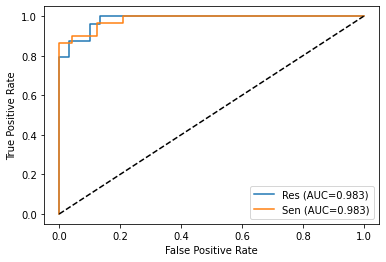

In [147]:
plot_roc_multi(y_test, val_pred, n_classes)

#### Plot learning curve -- accuracy

In [117]:
def plot_learning_curve_keras(hist,epoch,metric1,metric2):
  loss = hist.history[metric1]
  loss_val = hist.history[metric2]
  plt.plot(range(epoch), loss)
  plt.plot(range(epoch), loss_val)
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.legend(['training','validation'])
  return plt.show()

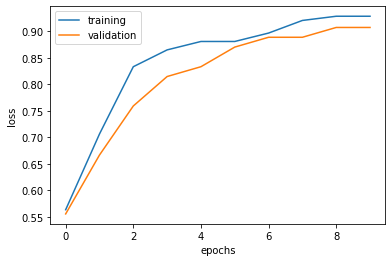

In [118]:
plot_learning_curve_keras(result, 10,'accuracy','val_accuracy')